In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Count'>

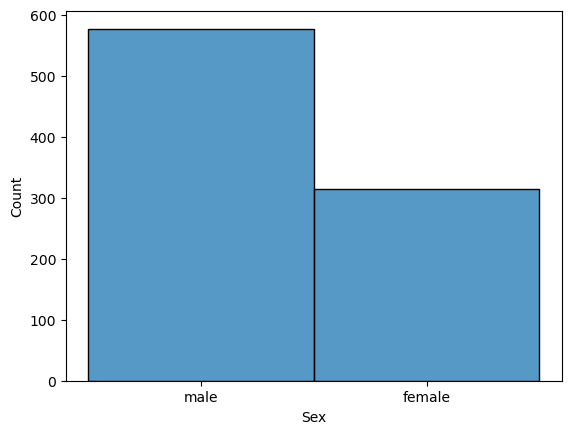

In [7]:
sns.histplot(x=data.Sex)

In [8]:
cat_vars = data.select_dtypes(include='object').columns.tolist()
len(cat_vars)

5

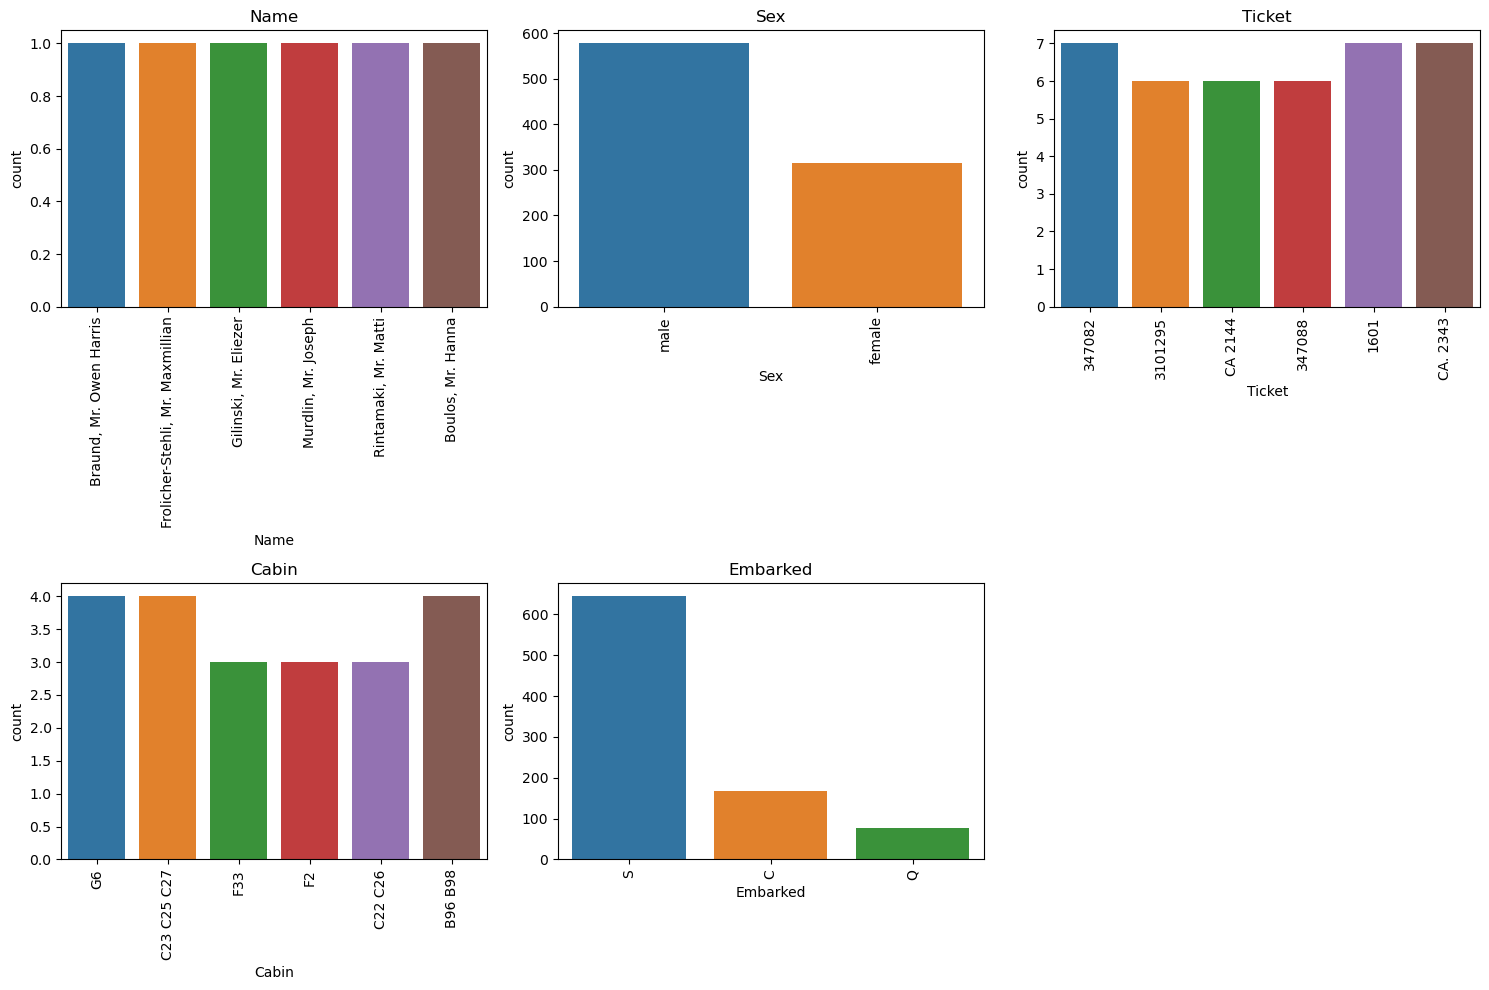

In [9]:
# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = data[var].value_counts().nlargest(6).index
    filtered_data = data[data[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_data, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

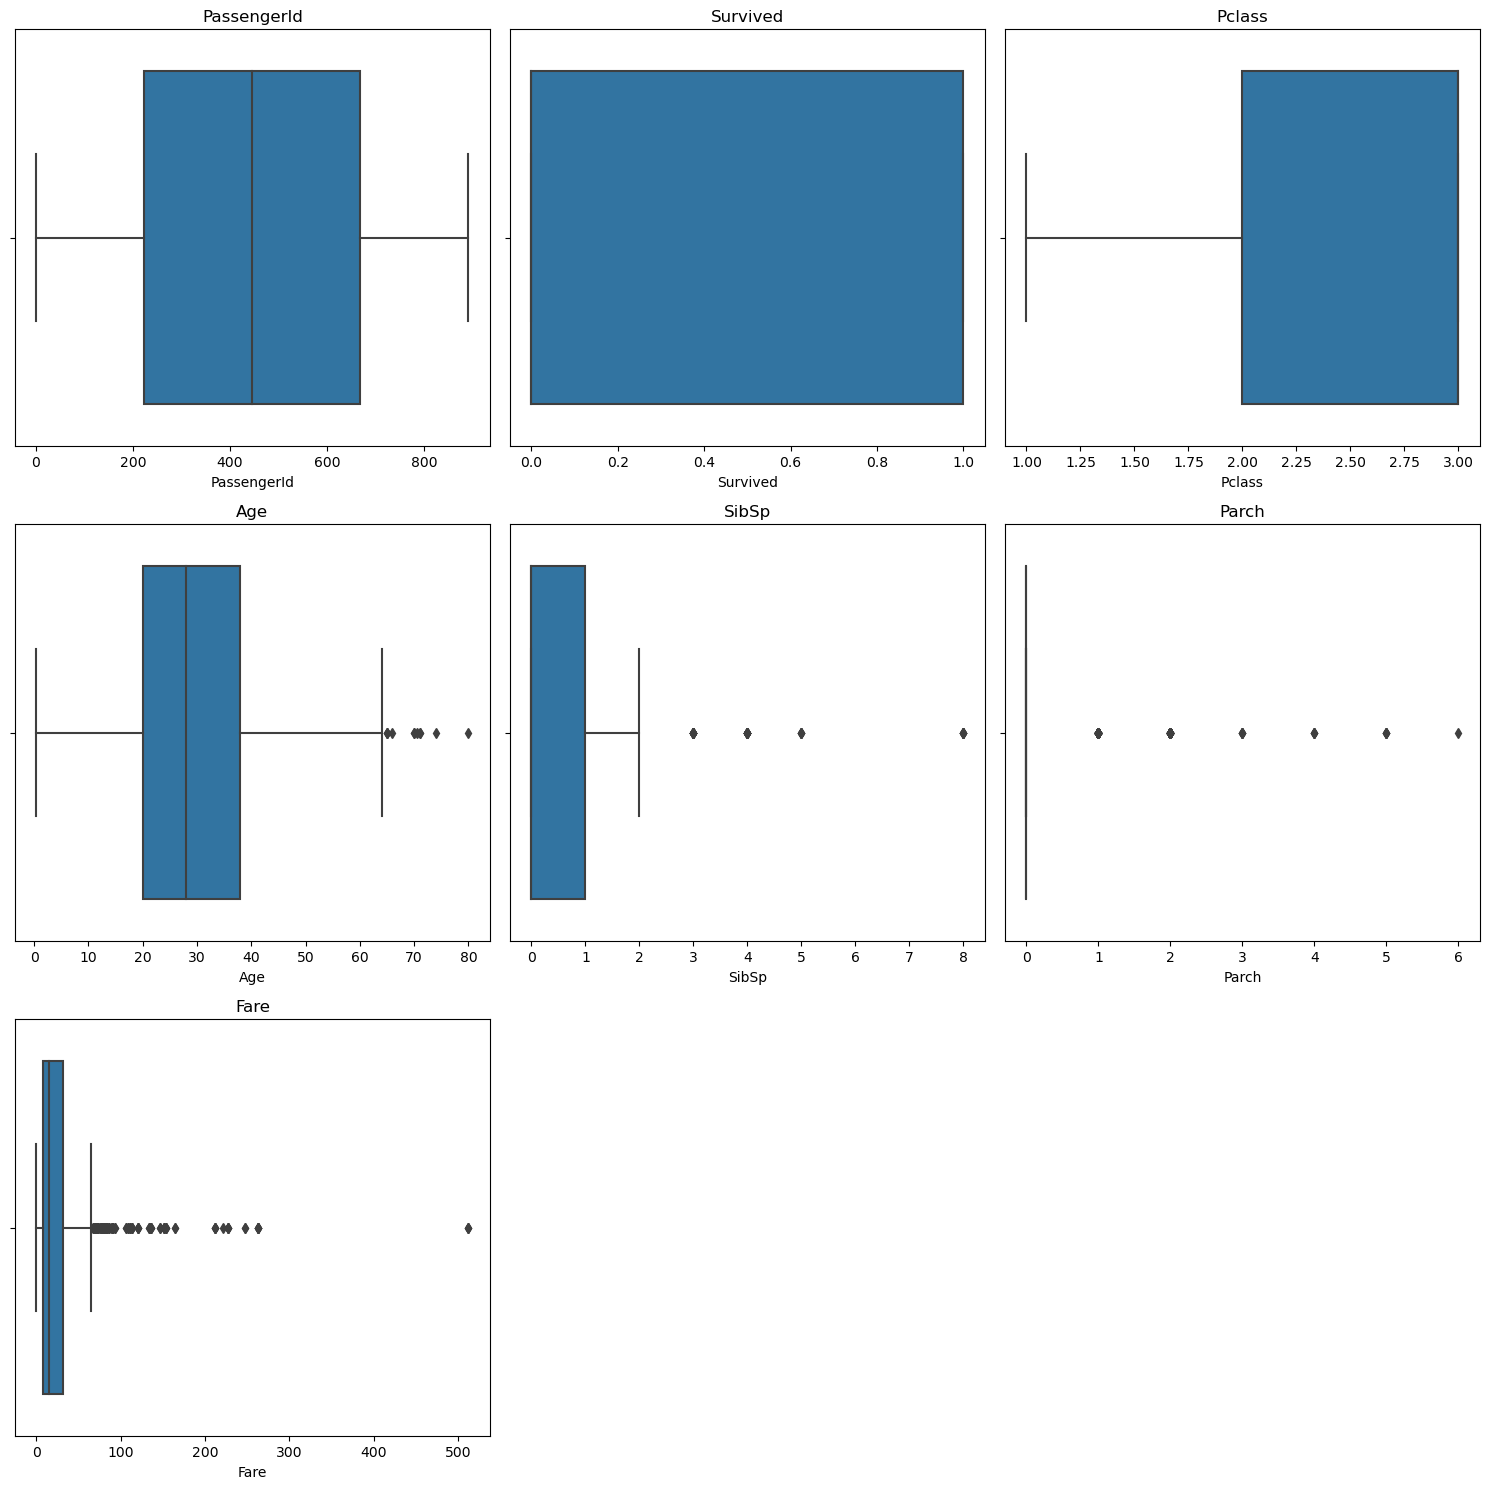

In [10]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = data.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=data[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

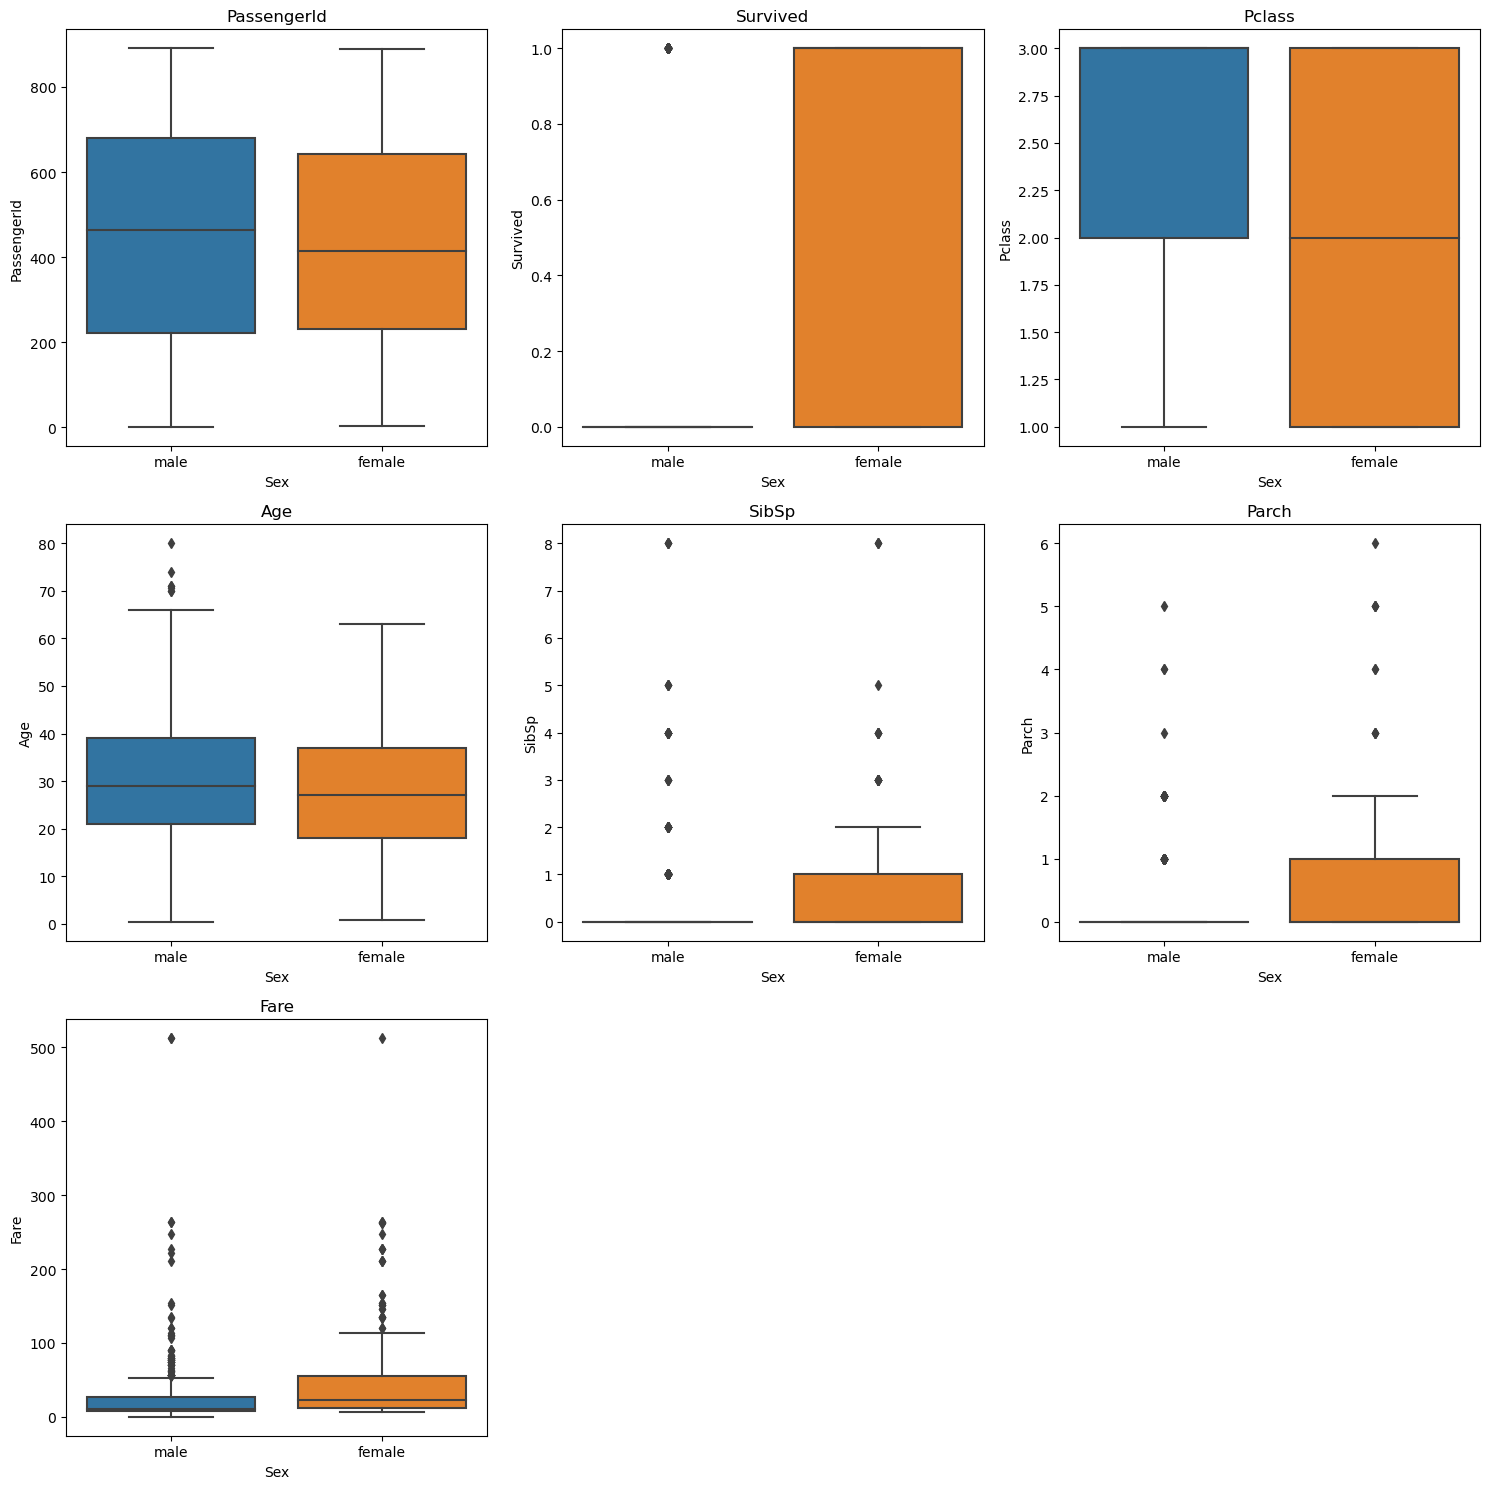

In [11]:
# Get the names of all columns with data type 'int'
int_vars = data.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Sex', data=data, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

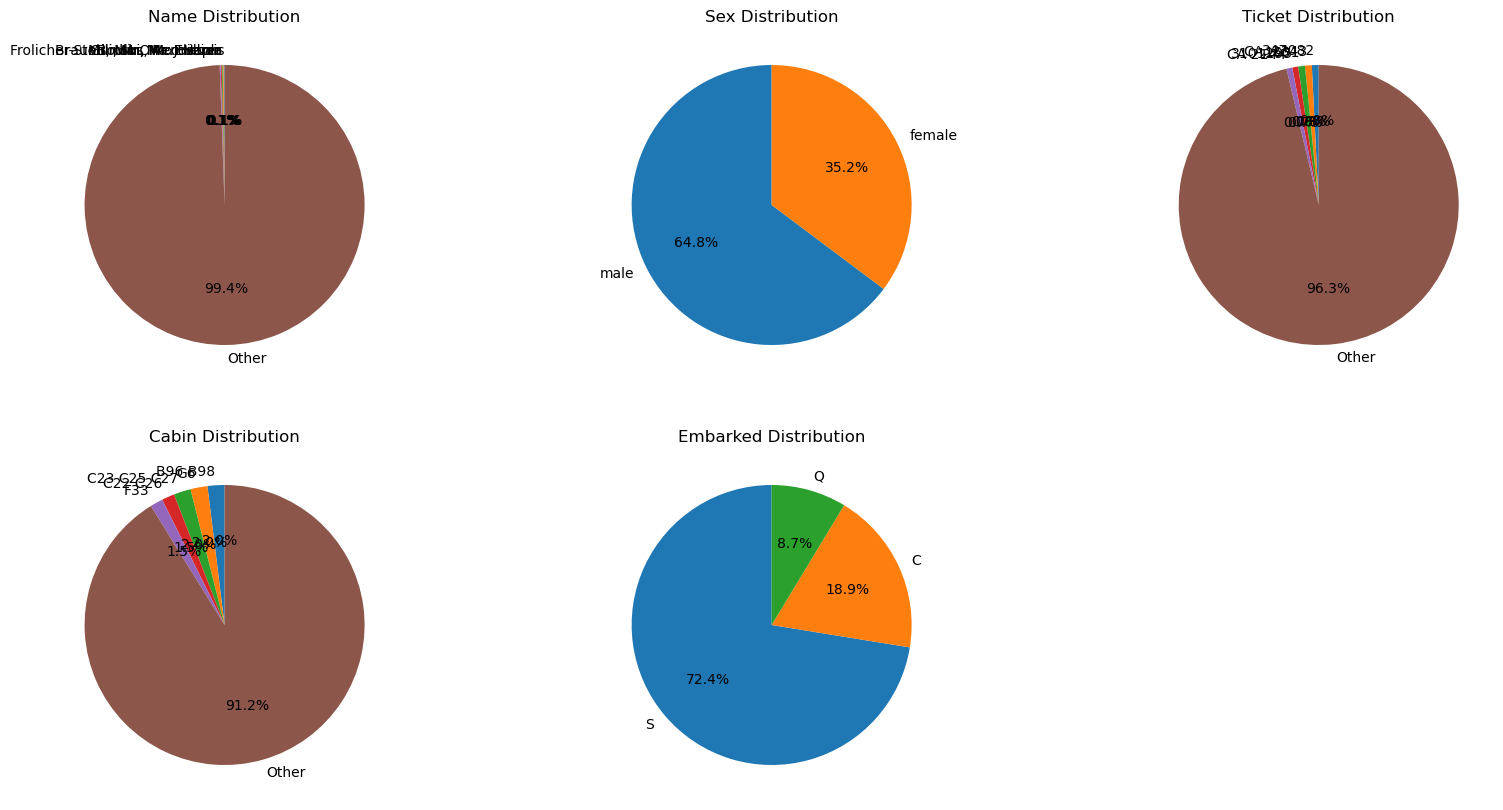

In [12]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in data.columns if col != 'y' and data[col].dtype == 'object']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = data[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            #cat_counts = cat_counts_top.append(cat_counts_other)
            cat_counts = pd.concat([cat_counts_top, cat_counts_other])


        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots

# Show plot
plt.show()

In [13]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

In [14]:
subset_columns = ['Cabin','Age','Embarked']
data.dropna(subset=subset_columns, inplace=True)

In [15]:
data.shape

(183, 12)

In [16]:
# Check again the amounnt of missing value
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [17]:
data.drop('Name', axis=1, inplace=True)

In [18]:
data.drop('Cabin', axis=1, inplace=True)

In [19]:
data.drop('Ticket', axis=1, inplace=True)

In [20]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
10,11,1,3,female,4.0,1,1,16.7000,S
11,12,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,52.5542,S
872,873,0,1,male,33.0,0,0,5.0000,S
879,880,1,1,female,56.0,0,1,83.1583,C
887,888,1,1,female,19.0,0,0,30.0000,S


In [21]:
for col in data.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {data[col].unique()}")

Sex: ['female' 'male']
Embarked: ['C' 'S' 'Q']


In [22]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(data[col].unique())

    # Transform the column using the encoder
    data[col] = label_encoder.transform(data[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {data[col].unique()}")

Sex: [0 1]
Embarked: [0 2 1]


<AxesSubplot:>

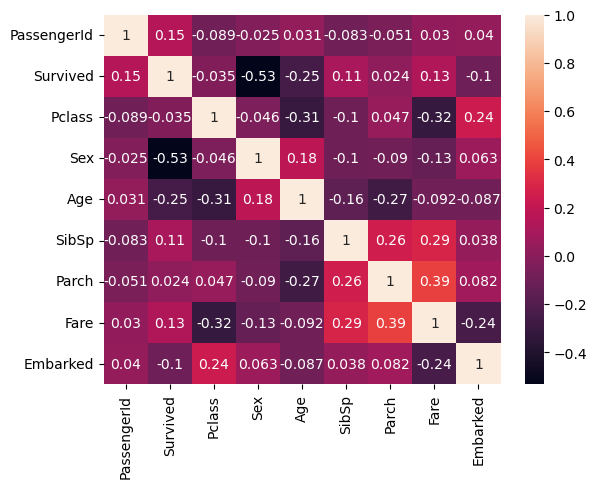

In [23]:
sns.heatmap(data.corr(), fmt='.2g', annot=True)

In [24]:
duplicates = data[data.duplicated()]

# Display duplicate rows
print("Duplicate Rows except first occurrence:")
print(duplicates)

# Remove duplicates and update the DataFrame
data_no_duplicates = data.drop_duplicates()

# Display the DataFrame without duplicates
print("\nDataFrame after removing duplicates:")
print(data_no_duplicates)

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []

DataFrame after removing duplicates:
     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
1              2         1       1    0  38.0      1      0  71.2833         0
3              4         1       1    0  35.0      1      0  53.1000         2
6              7         0       1    1  54.0      0      0  51.8625         2
10            11         1       3    0   4.0      1      1  16.7000         2
11            12         1       1    0  58.0      0      0  26.5500         2
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
871          872         1       1    0  47.0      1      1  52.5542         2
872          873         0       1    1  33.0      0      0   5.0000         2
879          880         1       1    0  56.0      0      1  83.1583         0
887          888         